<a href="https://colab.research.google.com/github/Okesha2000/Sales_Python/blob/main/Sales_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

Create a python script that analyzes a retail sales dataset, focusing on data manipulation with pandas and visualization of sales trends.

# Input Data set

Use a simplified retail sales data set in CSV format, which might include columns like :

* Date
* Product
* Quantity
* Sales

This data set represents daily sales data for a small retail store.

In [3]:
import pandas as pd

sales = pd.read_csv('/content/retail_sales.csv')

# Task Description

1.   Read data
  *   Load the CSV data into a pandas dataframe

2.   Data Cleaning
  *   Check for and remove rows with missing values in any column.

3.  Data Manipulation
  * Calculate total sales per product
  * Identify the best selling product
  * Compute average daily products

4. Visualization
  * Plot sales trend over time
  * Display sales per product in a bar chart

5. Class and Function
  * Define a python class *RetailSalesAnalyzer* with methods for each of the above tasks. (loading data, Calculating statinsics, and creating visualiations)

6. Script Execution
  * Write a script that creates an instance of *RetailSalesAnalyzer* , calls its methods and display the results.
  





# ans:1

In [17]:
df = pd.DataFrame(sales)
print(df)

        Date    Product  Quantity  Sales
0   1/1/2023  Product A       5.0   50.0
1   1/1/2023  Product B       2.0   40.0
2   2/1/2023  Product A       7.0   70.0
3   2/1/2023  Product C       3.0   90.0
4   2/1/2023  Product A       NaN   70.0
5   2/1/2023  Product C       3.0    NaN
6   3/1/2023  Product B       4.0   80.0
7   3/1/2023  Product C       2.0   60.0
8   4/1/2023  Product A       1.0   10.0
9   4/1/2023  Product B       1.0   20.0
10  4/1/2023  Product A       2.0    NaN
11  4/1/2023  Product B       3.0   20.0


# Ans:2

In [18]:
df = df.dropna()

# Ans:3

In [19]:
total_sales_per_product = df.groupby(['Product'])['Sales'].sum()
df2 = total_sales_per_product.reset_index()
df2 = pd.DataFrame(df2)
print(df2)

best_selling_product = df2.loc[df2['Sales'].idxmax(), 'Product']
print("Best Selling Product:", best_selling_product)

average_daily_products = df.groupby(['Date','Product'])['Sales'].mean(())
df3 = average_daily_products.reset_index()
df3 = pd.DataFrame(df3)
print(df3)

     Product  Sales
0  Product A  130.0
1  Product B  160.0
2  Product C  150.0
Best Selling Product: Product B
       Date    Product  Sales
0  1/1/2023  Product A   50.0
1  1/1/2023  Product B   40.0
2  2/1/2023  Product A   70.0
3  2/1/2023  Product C   90.0
4  3/1/2023  Product B   80.0
5  3/1/2023  Product C   60.0
6  4/1/2023  Product A   10.0
7  4/1/2023  Product B   20.0


# Ans:4

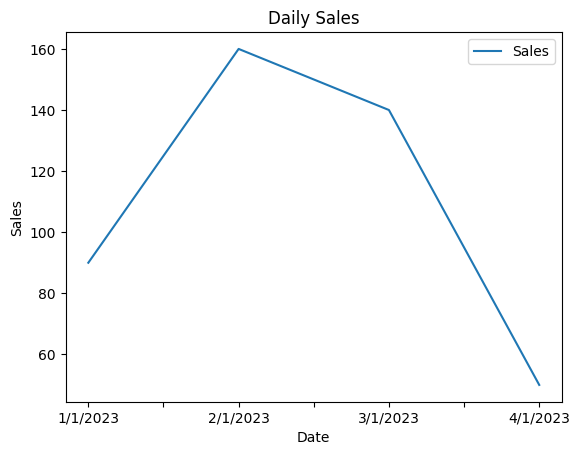

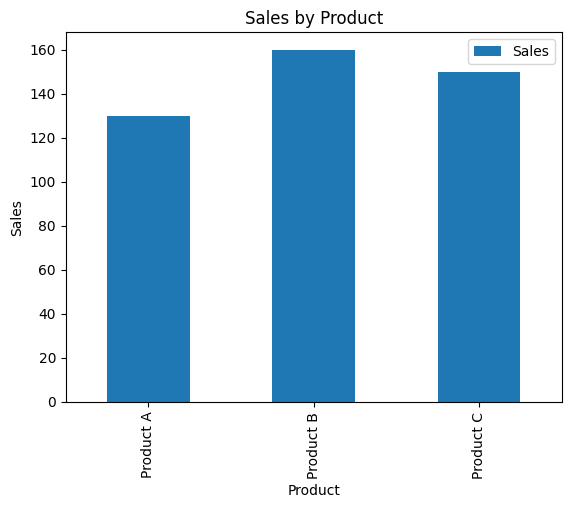

In [23]:
import matplotlib.pyplot as plt

daily_pod= df.groupby('Date')['Sales'].sum()
df4 = daily_pod.reset_index()
df4 = pd.DataFrame(df4)

df4.plot(x='Date', y='Sales', kind='line')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales')

plt.show()


df2.plot(x='Product', y='Sales', kind='bar')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Sales by Product')

plt.show()

In [33]:
class RetailSalesAnalyzer:
  def __init__(self):
        self.data = pd.read_csv('/content/retail_sales.csv')
        self.data = pd.DataFrame(self.data)
        self.data['Date'] = pd.to_datetime(self.data['Date'])

  def data_clean(self):
        self.data.dropna(inplace=True)

  def total_sales_per_product(self):
        return self.data.groupby('Product')['Sales'].sum()

  def best_selling_product(self):
        return self.total_sales_per_product().sort_values(ascending=False).index[0]

  def daily_products(self):
        return self.data['Sales'].mean()

  def trend_plot(self):
        self.data.groupby('Date')['Sales'].sum().plot(kind='line')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.title('Daily Sales')
        plt.show()

  def prod_plot(self):
        self.data.groupby('Product')['Sales'].sum().plot(kind='bar')
        plt.xlabel('Product')
        plt.ylabel('Sales')
        plt.title('Sales')
        plt.show()


# Ans:6

Total sales per product:
 Product
Product A    130.0
Product B    160.0
Product C    150.0
Name: Sales, dtype: float64
Best selling product:
 Product B
Daily sales:
 48.888888888888886


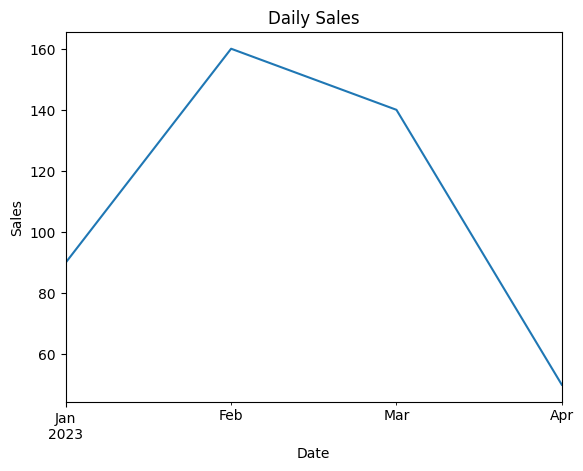

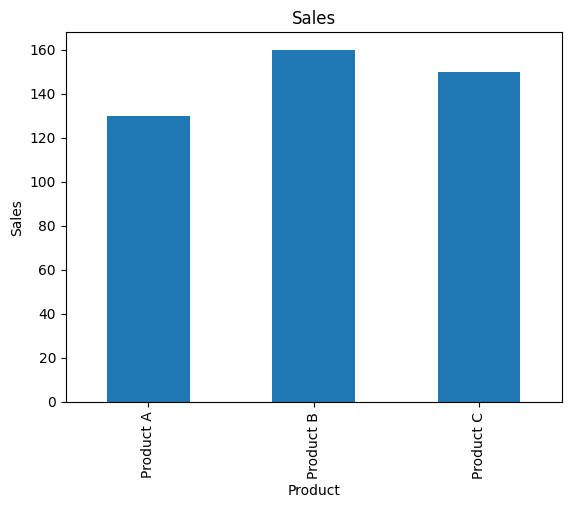

In [34]:
analyzer = RetailSalesAnalyzer()
analyzer.data_clean()
print('Total sales per product:\n',analyzer.total_sales_per_product())
print('Best selling product:\n', analyzer.best_selling_product())
print('Daily sales:\n', analyzer.daily_products())
analyzer.trend_plot()
analyzer.prod_plot()